<a href="https://colab.research.google.com/github/prof-eduardo-galego/fiap-labs-data-analysis/blob/main/introducao_analise_dados_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Análise de Dados Exploratória

Montamos este pequeno tutorial para exemplificar, de maneira prática, os passos para a análise de dados exploratória.

Conteúdo baseado de https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python.

## Passo 1: Definição do problema

É sempre importante ter clareza sobre o problema que deseja atacar, bem como os dados disponíveis.

Para auxiliar, crie um conjunto de perguntar à responder, tais como:
* Como chegamos até aqui?
* Qual a situação atual?
* O que podemos fazer a partir de agora?

## Passo 2: Coleta de Dados

Após identificar quais são os Data Sources disponíveis, monte um Notebook e faça a importação dos dados.

Em certas ocasiões, utilizar todo o volume de dados pode ser demorado. Podemos, assim, definir um volume de amostra para analisarmos.

In [2]:
import pandas as pd                         # Biblioteca para trabalhar com datasets
import numpy as np                          # Biblioteca de funções matemáticas
import matplotlib.pyplot as plt             # Biblioteca para criação de gráficos (simples)
import seaborn as sns                       # Biblioteca para criação de gráficos (avançado)

%matplotlib inline
sns.set(color_codes=True)

df = pd.read_csv("data.csv")

df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Também é importante nesta etapa conhecer mais a respeito dos dados.

In [3]:
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [4]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
df.shape

(11914, 16)

In [28]:
df.describe()

,Year,HP,Cylinders,MPG-H,MPG-C,Price
count,7649.000000,7649.000000,7649.000000,7649.000000,7649.000000,7.649000e+03
mean,2012.287489,278.462283,5.836841,26.543600,19.477840,5.135304e+04
std,6.050788,115.232211,1.898248,7.816222,7.262474,7.175336e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2010.000000,195.000000,4.000000,22.000000,16.000000,2.645000e+04
50%,2015.000000,270.000000,6.000000,26.000000,18.000000,3.572500e+04
75%,2016.000000,325.000000,6.000000,30.000000,22.000000,4.951500e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


## Passo 3: Limpeza dos Dados

Nesta etapa identificamos dados que podem "sujar" a nossa análise, como nulos, linhas duplicadas ou outliers.

In [22]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

KeyError: "['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'] not found in axis"

In [23]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [24]:
print("quantidade de linhas antes da remoção: ", len(df))

duplicate_rows_df = df[df.duplicated()]
print("quantidade de linhas duplicadas: ", duplicate_rows_df.shape)

df = df.drop_duplicates()

print("quantidade de linhas após a remoção: ", len(df))

quantidade de linhas antes da remoção:  7649
quantidade de linhas duplicadas:  (0, 10)
quantidade de linhas após a remoção:  7649


In [12]:
print(df.isnull().sum())

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


,0
Make,7735
Model,7735
Year,7735
Engine Fuel Type,7735
Engine HP,7735
Engine Cylinders,7735
Transmission Type,7735
Driven_Wheels,7735
Number of Doors,7735
Market Category,7735


In [ ]:
df = df.dropna()
print(df.isnull().sum())

In [ ]:
sns.boxplot(x=df['Price'])

In [29]:
df['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'McLaren',
       'Maybach', 'Porsche', 'Toyota', 'Saab', 'GMC', 'Hyundai', 'Honda',
       'Cadillac', 'Bentley', 'Ford', 'Oldsmobile', 'Chevrolet', 'Dodge',
       'Lamborghini', 'Lincoln', 'Pontiac', 'Subaru', 'Volkswagen',
       'Spyker', 'Kia', 'Acura', 'Plymouth', 'Rolls-Royce', 'Maserati',
       'Lexus', 'Aston Martin', 'Land Rover', 'Lotus', 'Buick',
       'Infiniti', 'Scion', 'Genesis', 'Suzuki', 'HUMMER', 'Bugatti'],
      dtype=object)

## Passo 4: Análise dos Dados

Vamos utilizar de alguns conceitos estatísticos (como estatísticas descritiva) à procura de algum insight sobre os dados:

In [31]:
df[df['Price'] == df['Price'].max()]

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
11362,Bugatti,Veyron 16.4,2008,1001.0,16.0,AUTOMATED_MANUAL,all wheel drive,14,8,2065902


In [32]:
df[df['Make'] == 'BMW']

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11901,BMW,Z4,2016,240.0,4.0,MANUAL,rear wheel drive,34,22,49700
11902,BMW,Z4,2016,335.0,6.0,AUTOMATED_MANUAL,rear wheel drive,24,17,66350
11903,BMW,Z8,2001,394.0,8.0,MANUAL,rear wheel drive,19,12,128000
11904,BMW,Z8,2002,394.0,8.0,MANUAL,rear wheel drive,19,12,130000


In [33]:
df[df['Year'] == 2015].shape[0]

1611

In [34]:
df['Make'].value_counts()

,count
Make,
Chevrolet,607
Ford,481
Volkswagen,411
Cadillac,396
Mercedes-Benz,340
Infiniti,326
BMW,324
Audi,320
Nissan,308


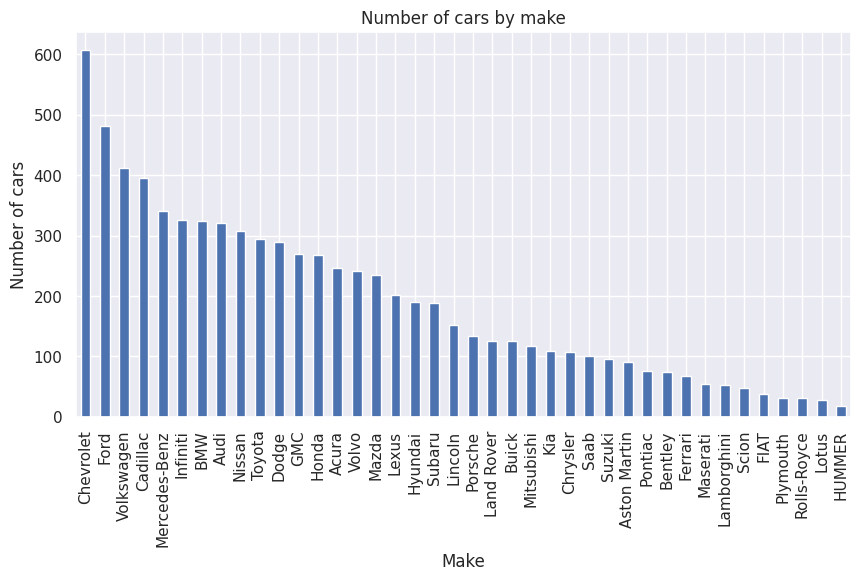

In [25]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

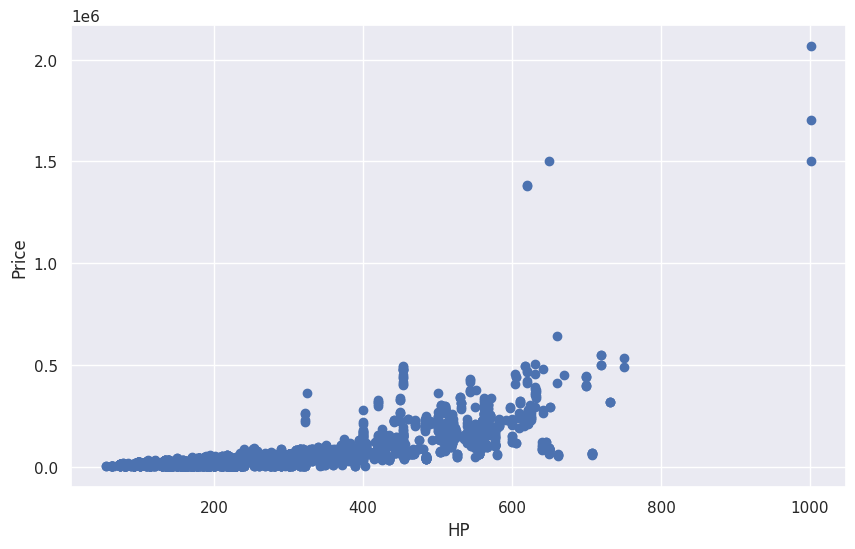

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()